## Introduction
  Bellabeat, a high-tech company that manufactures health-focused smart device products for women, is focusing on becoming a dominant player in the global smart device market. To aid in this endeavor, I was assigned to analyze smart device data to gain insight into how consumers use their smart devices and whether these discoveries may unlock new growth opportunities for the company. Furthermore, any insights gained may influence to an effective marketing strategy for the company.

## Business Task
  
 1. What are some trends in smart device usage?
 2. How could these trends apply to Bellabeat customers?
 3. How could these trends help influence Bellabeat marketing strategy?
 
## Description of Data Sources
 FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This  Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible    Fitbit users consented to the submission of personal tracker data, including minute-level      output for physical activity, heart rate, and sleep monitoring. It includes information about  daily activity, steps, and heart rate that can be used to explore users’ habits.

## Summary of Analysis
### Upload Data

In [1]:
# Load library
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
# Import CSV files
activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

In [3]:
# Explore data set

head(activity)
head(sleep)

glimpse(activity)
glimpse(sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

There were a few things noted upon initial review:

 1. The column names are in both upper and lower-case letters.
 2. Date format is character.
 3. The date columns in both data sets are named differently.

In [4]:
# Standardizing the column names
activity <- clean_names(activity)
sleep <- clean_names(sleep)


# Changing the format of the date column
activity$activity_date <- mdy(activity$activity_date)
sleep$sleep_day <- mdy_hms(sleep$sleep_day)


# Addressing the name of the date column for consistency
activity <- rename(activity, date="activity_date")
sleep <- rename(sleep, date="sleep_day")


glimpse(activity)
glimpse(sleep)

Rows: 940
Columns: 15
$ id                         <dbl> 1503960366, 1503960366, 1503960366, 1503960…
$ date                       <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ total_steps                <int> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_minutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, …
$ lightly_active_m

### Cleaning Data
Now that the datasets are consistent, we will continue with cleaning the data.

In [5]:
# Finding NA values
which(is.na(activity))
which(is.na(sleep))

integer(0)

integer(0)

In [6]:
# Checking for duplicates
sum(duplicated(activity))
sum(duplicated(sleep))

[1] 0

[1] 3

The sleep data is showing 410 distinct observations compared to the original 413.

In [7]:
# Removing the duplicates in data sleep data
sleep <- sleep %>% 
  unique()

### Analyze Data
First, we will start with a quick overview of each data set.

In [8]:
# Quick summary of the data.
activity %>% 
  summary()

sleep %>% 
  summary()

       id                 date             total_steps    total_distance  
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Median :4.445e+09   Median :2016-04-26   Median : 7406   Median : 5.245  
 Mean   :4.855e+09   Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 tracker_distance logged_activities_distance very_active_distance
 Min.   : 0.000   Min.   :0.0000             Min.   : 0.000      
 1st Qu.: 2.620   1st Qu.:0.0000             1st Qu.: 0.000      
 Median : 5.245   Median :0.0000             Median : 0.210      
 Mean   : 5.475   Mean   :0.1082             Mean   : 1.503      
 3rd Qu.: 7.710   3rd Qu.:0.0000             3rd Qu.: 2.053      
 Max.   :28.030   Max.   :4.9421             Max.   :21.920      
 moderately_a

       id                 date                     total_sleep_records
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :1.00       
 1st Qu.:3.977e+09   1st Qu.:2016-04-19 00:00:00   1st Qu.:1.00       
 Median :4.703e+09   Median :2016-04-27 00:00:00   Median :1.00       
 Mean   :4.995e+09   Mean   :2016-04-26 11:38:55   Mean   :1.12       
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04 00:00:00   3rd Qu.:1.00       
 Max.   :8.792e+09   Max.   :2016-05-12 00:00:00   Max.   :3.00       
 total_minutes_asleep total_time_in_bed
 Min.   : 58.0        Min.   : 61.0    
 1st Qu.:361.0        1st Qu.:403.8    
 Median :432.5        Median :463.0    
 Mean   :419.2        Mean   :458.5    
 3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :796.0        Max.   :961.0    

In [9]:
# Count the participants in each data set
activity %>% 
  count(id)

sleep %>% 
  count(id)

id,n
<dbl>,<int>
1503960366,31
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31
2347167796,18


id,n
<dbl>,<int>
1503960366,25
1644430081,4
1844505072,3
1927972279,5
2026352035,28
2320127002,1
2347167796,15
3977333714,28
4020332650,8


The activity data set has 33 unique id's and the sleep data has 24. The data show differences in the number of observations among the participants in both data sets - suggesting that not all participants use their devices daily. The data also show fewer participants in the sleep data set, indicating that consumers are less likely to use their devices when going to sleep. We will explore these matters further.

Joining with `by = join_by(id)`
Warning message:
“Removed 9 rows containing missing values (`geom_bar()`).”


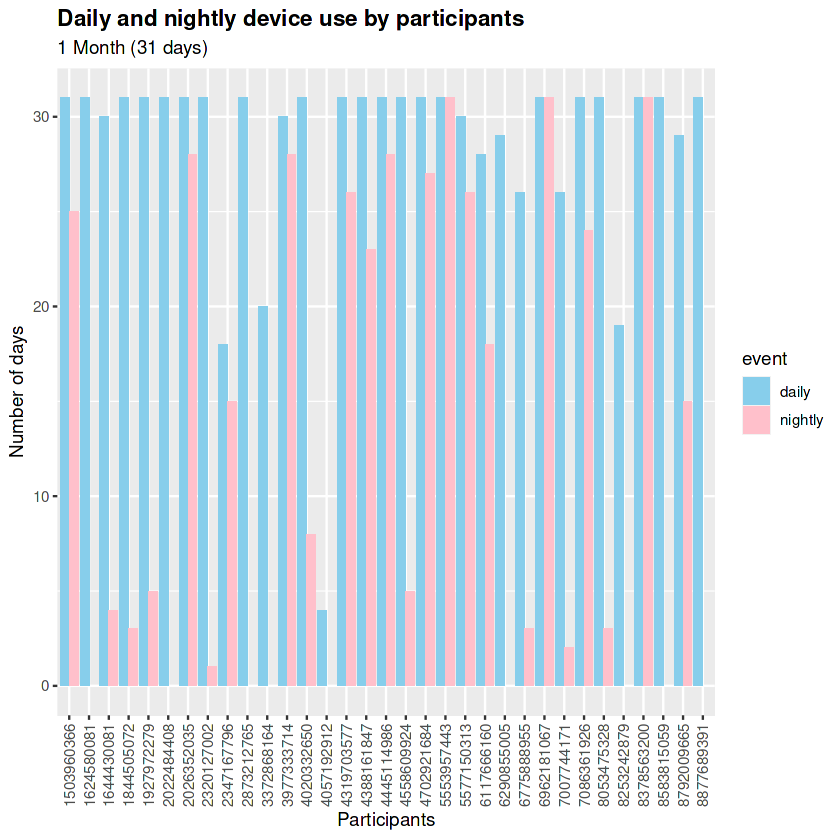

In [10]:
# Create new data sets
d_activity <- activity %>% 
  count(id)

d_sleep <- sleep %>% 
  count(id)


# Rename column "n" to "daily" and "nightly" for each
d_activity <- rename(d_activity, daily="n")
d_sleep <- rename(d_sleep, nightly="n")


# Left-join d_sleep with d_activity by id
# Assign to "d_usage"
d_usage <- left_join(d_activity, d_sleep)


# Mutate "id" column from numeric to character
d_usage <- d_usage%>% 
  mutate(id = as.character(id))


# Convert data with the gather() 
d_usage <- gather(d_usage, event, total, daily:nightly)


# Plot daily and nightly device usage for participants
ggplot(d_usage, aes(id, total, fill=event)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = c("skyblue","pink")) +
  theme(plot.title = element_text(face = "bold")) +
  labs(title = "Daily and nightly device use by participants", subtitle = "1 Month (31 days)", x="Participants", y="Number of days")+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

We will categorize the users into "events" for each dataset, depending on their total count of usage. The categories will be 20, 20-30, and 31 (days or nights). 

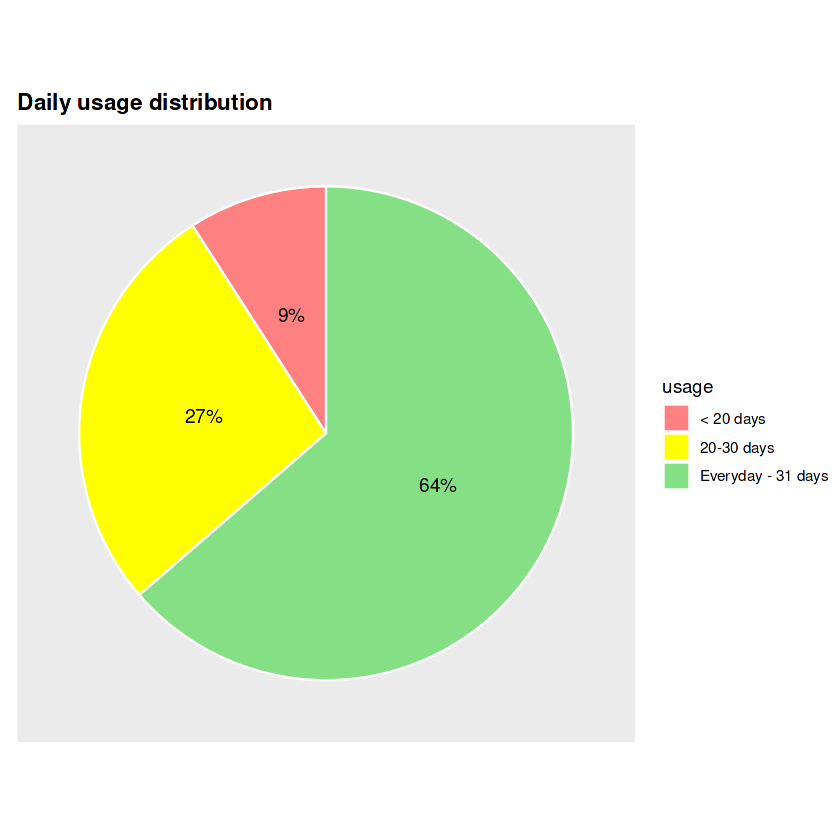

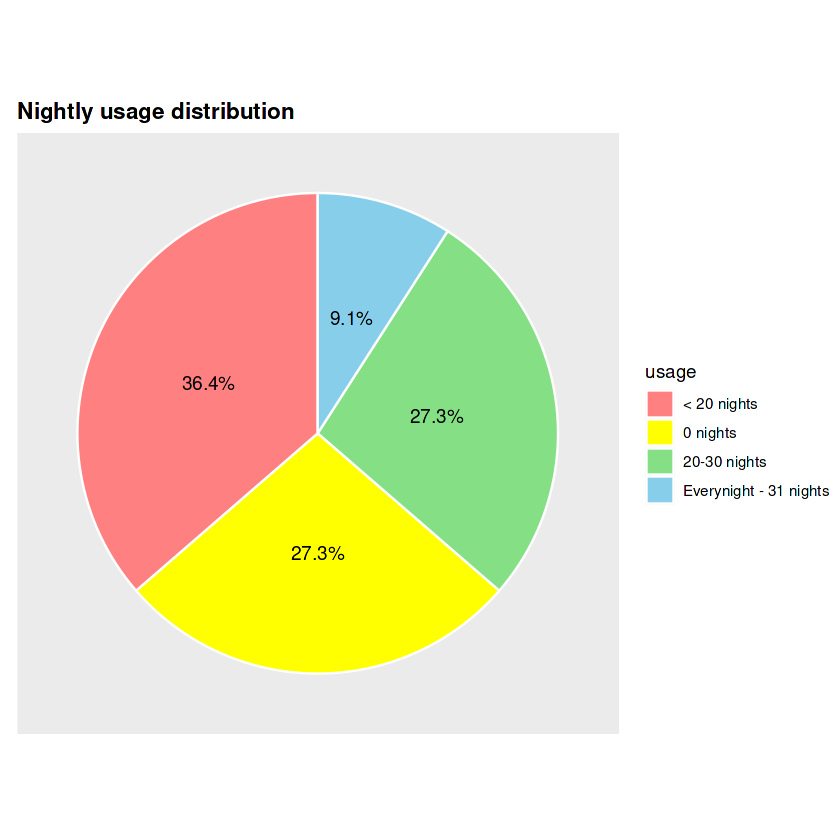

In [11]:
# Plot daily use
d_usage %>% 
  filter(event=="daily") %>% 
  mutate(usage = case_when(
    total >=1 & total <20 ~"< 20 days", 
    total >=20 & total <=30 ~ "20-30 days", 
    total >=31 ~ "Everyday - 31 days"
  )) %>% 
  count(usage) %>%
  mutate(percent = n/33) %>% 
  mutate(labels = scales::percent(percent)) %>% 
  ggplot(aes("", n, fill=usage)) +
  geom_bar(stat = "identity", width = 1, color="white") +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("#ff8080", "yellow", "#85e085")) +
  theme(
    axis.title.x = element_blank(),  
    axis.title.y = element_blank(), 
    panel.border = element_blank(), 
    panel.grid = element_blank(),    
    axis.ticks = element_blank(),    
    axis.text.x = element_blank(),   
    plot.title = element_text(face = "bold")) +
  geom_text(aes(label = labels), position = position_stack(vjust = 0.5)) +
  labs(title = "Daily usage distribution")


# Plot nightly use
d_usage %>% 
  filter(event=="nightly") %>% 
  replace(is.na(.), 0) %>%  # Replacing NA values with "0" for plotting
  mutate(usage = case_when(
    total == 0 ~ "0 nights",
    total >=1 & total <20 ~"< 20 nights", 
    total >=20 & total <=30 ~ "20-30 nights", 
    total >=31 ~ "Everynight - 31 nights")) %>%
  count(usage) %>%
  mutate(percent = n/33) %>% 
  mutate(labels = scales::percent(percent)) %>% 
  ggplot(aes("", n, fill=usage)) +
  geom_bar(stat = "identity", width = 1, color="white") +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("#ff8080", "yellow", "#85e085","skyblue")) +
  theme(
    axis.title.x = element_blank(),  
    axis.title.y = element_blank(), 
    panel.border = element_blank(), 
    panel.grid = element_blank(),    
    axis.ticks = element_blank(),    
    axis.text.x = element_blank(),   
    plot.title = element_text(face = "bold")) +
  geom_text(aes(label = labels), position = position_stack(vjust = 0.5)) +
  labs(title = "Nightly usage distribution")

Of the 33 participants, 21 have donned their devices daily, and only three have donned them nightly. One participant used their device for only four days, and 9 participants have no recorded observation of wearing them to sleep. 

Now that we have insights into the device donning habits of consumers, we will continue to see if there is a correlation with the length of time worn during the day. 

We will calculate the total percent worn and categorize users into three categories: "All day," "more than half the day," and "less than a day."


In [12]:
# Create data frame for time worn
# Create "total minutes" column with the sum of all the minutes fields 
# Categorize users by the length of time worn
time_worn <- activity %>%
  mutate(total_minutes = very_active_minutes + fairly_active_minutes + lightly_active_minutes + sedentary_minutes) %>%
  mutate(percent_worn = (total_minutes/1440) * 100) %>%
  mutate(amount_worn = case_when(
    percent_worn == 100 ~ "All day",
    percent_worn >= 50 & percent_worn <100 ~ "more than half the day",
    percent_worn < 50 ~ "less than half a day"))

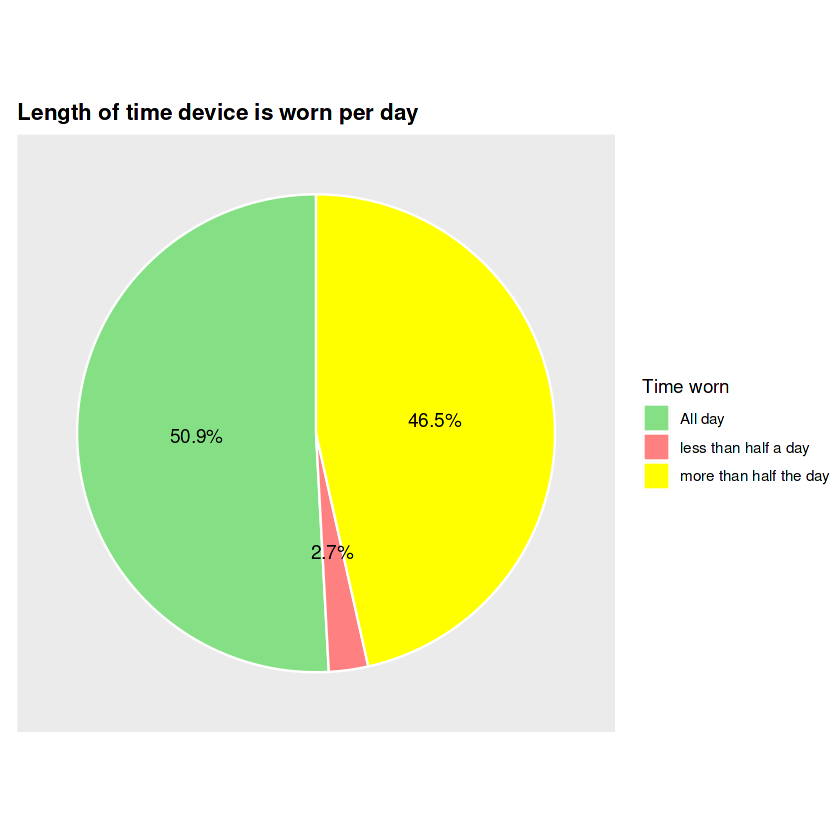

In [13]:
# Plot amount of time device is worn during the day
time_worn %>%   
  group_by(amount_worn) %>% 
  summarise(total=n()) %>% 
  mutate(totals=sum(total)) %>% 
  mutate(percent=total/totals) %>% 
  mutate(labels=scales::percent(percent)) %>% 
  ggplot(aes("", total, fill=amount_worn))+
  geom_bar(stat = "identity", width = 1, color="white") +
  coord_polar("y", start=0)+
  scale_fill_manual(values = c("#85e085", "#ff8080", "yellow"))+
  theme(
    axis.title.x = element_blank(),  
    axis.title.y = element_blank(), 
    panel.border = element_blank(), 
    panel.grid = element_blank(),    
    axis.ticks = element_blank(),    
    axis.text.x = element_blank(),   
    plot.title = element_text(face = "bold")) +
  geom_text(aes(label = labels), position = position_stack(vjust = 0.5)) +
  labs(title = "Length of time device is worn per day") +
  guides(fill=guide_legend(title = "Time worn"))

Almost 51% of participants wears their device all day.

In [14]:
# Plot the relationship between daily donning vs length of time use
# Create data frame for mean time worn
mean_time_worn <- time_worn %>% 
  group_by(id) %>% 
  summarise(mean_time=mean(total_minutes))


# Merge daily activity with mean time worn
day_time <- merge(d_activity, mean_time_worn, by = c("id"))


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 31.135”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.135”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at 31.135”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 1.135”
Warning message in predLoess

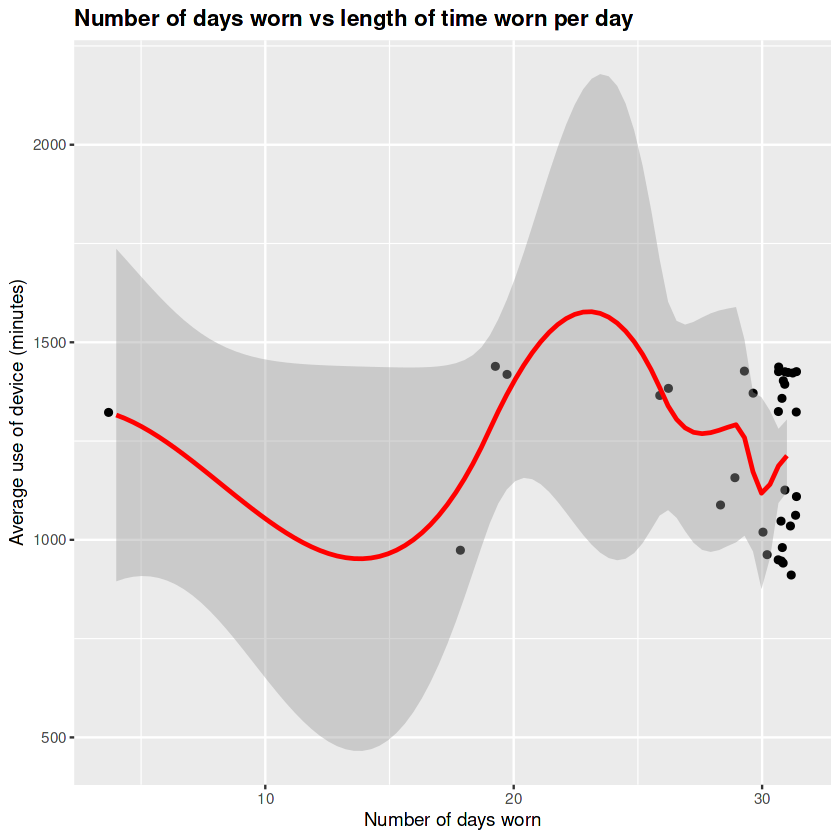

In [15]:
# Plot daily use vs time spent on device per day     
ggplot(day_time, aes(x=daily, y=mean_time)) +
  geom_jitter() +
  geom_smooth(color = "red")+
  theme(plot.title = element_text(face = "bold")) +
  labs(title = "Number of days worn vs length of time worn per day", x = "Number of days worn", y = "Average use of device (minutes)")

There is no correlation between the number of days worn and length of time worn. In other words, the average time the consumer wears their device per day does not increase with daily usage. 

We will continue our analysis and start by joining the original datasets "activity" and "sleep" together.

In [16]:
# Join original data sets as "act_sleep"
# Left join sleep data with activity data set
act_sleep <- left_join(activity, sleep, c("id", "date"))

# Add day of week as "day" column
act_sleep <- act_sleep %>% 
  mutate(day = weekdays(date))

# Relocate the day column immediately after the date column for easy viewing
act_sleep <- act_sleep %>% 
  relocate(day, .after = date)

# Change id column to character
act_sleep <- act_sleep %>% 
  mutate(id = as.character(id))

# Reorder weekday for plotting
act_sleep$day <- factor(act_sleep$day, levels = c(
  "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
))

glimpse(act_sleep)

Rows: 940
Columns: 19
$ id                         <chr> "1503960366", "1503960366", "1503960366", "…
$ date                       <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-0…
$ day                        <fct> Tuesday, Wednesday, Thursday, Friday, Satur…
$ total_steps                <int> 13162, 10735, 10460, 9762, 12669, 9705, 130…
$ total_distance             <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ tracker_distance           <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9…
$ logged_activities_distance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_distance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3…
$ moderately_active_distance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1…
$ light_active_distance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5…
$ sedentary_active_distance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ very_active_minutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66,…
$ fairly_active_mi

In [17]:
# Summary of data
act_sleep %>% 
  summary()

      id                 date                            day     
 Length:940         Min.   :2016-04-12 00:00:00   Monday   :120  
 Class :character   1st Qu.:2016-04-19 00:00:00   Tuesday  :152  
 Mode  :character   Median :2016-04-26 00:00:00   Wednesday:150  
                    Mean   :2016-04-26 06:53:37   Thursday :147  
                    3rd Qu.:2016-05-04 00:00:00   Friday   :126  
                    Max.   :2016-05-12 00:00:00   Saturday :124  
                                                  Sunday   :121  
  total_steps    total_distance   tracker_distance logged_activities_distance
 Min.   :    0   Min.   : 0.000   Min.   : 0.000   Min.   :0.0000            
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 2.620   1st Qu.:0.0000            
 Median : 7406   Median : 5.245   Median : 5.245   Median :0.0000            
 Mean   : 7638   Mean   : 5.490   Mean   : 5.475   Mean   :0.1082            
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.: 7.710   3rd Qu.:0.0000            
 Max

We will start exploring trends in how consumers use their smart devices for their health. We will create two classifications. First, under the "user_type" classification, we will categorize participants into four categories: "sedentary," "lightly active," "fairly active," and "very active," depending on their average step count per day. The second will be "fitness_type." We will associate the "very active minutes" column with exercise time and categorize users by "low," "moderate," "engaged," and "very engaged."

In [18]:
# Calculating average steps and very active minutes
mean_act <- act_sleep %>% 
  group_by(id) %>% 
  summarise(mean_steps = mean(total_steps),
            mean_active_min = mean(very_active_minutes))

head(mean_act)

id,mean_steps,mean_active_min
<chr>,<dbl>,<dbl>
1503960366,12116.742,38.7096774
1624580081,5743.903,8.6774194
1644430081,7282.967,9.5666667
1844505072,2580.065,0.1290323
1927972279,916.129,1.3225806
2022484408,11370.645,36.2903226


Categorize user type and fitness type

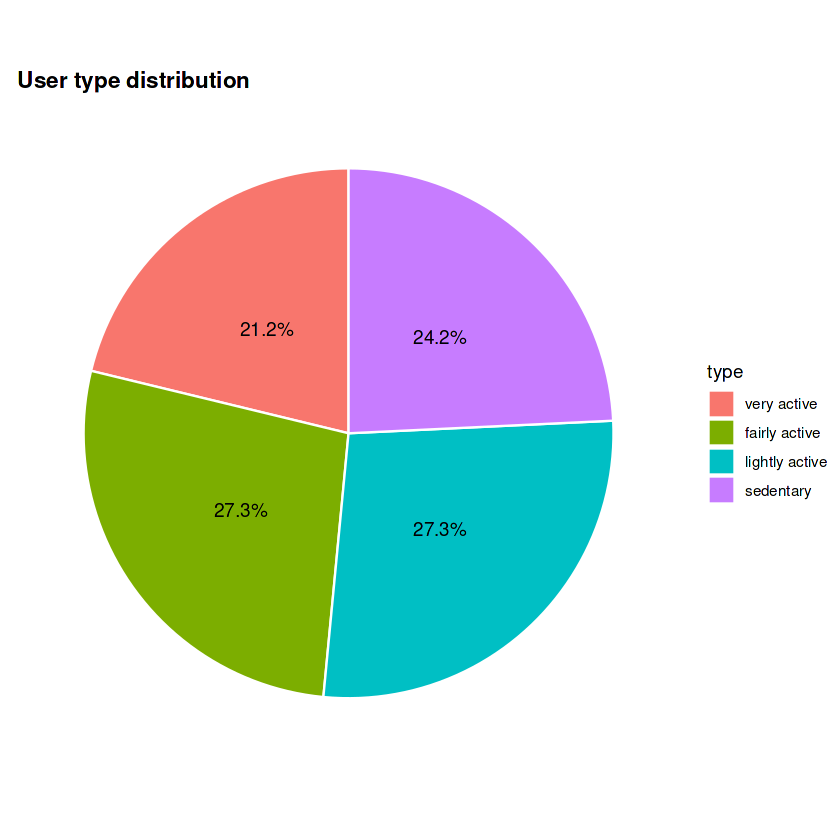

In [19]:
# Assign categories for each field
mean_act <- mean_act %>%  
  mutate(user_type = case_when(
    mean_steps < 5000 ~ "sedentary",
    mean_steps >= 5000 & mean_steps < 7499 ~ "lightly active",
    mean_steps >= 7500 & mean_steps < 9999 ~ "fairly active",
    mean_steps >= 10000 ~ "very active"
  )) %>% 
  mutate(fitness_type = case_when(
    mean_active_min < 15 ~ "low",
    mean_active_min >= 15 & mean_active_min < 30 ~ "moderate",
    mean_active_min > 30 & mean_active_min < 45 ~ "engaged",
    mean_active_min > 45 ~ "very engaged"
  ))

# Convert data from wide to long
act_type <- mean_act %>% 
  pivot_longer(cols = c("user_type", "fitness_type"), names_to = "category", values_to = "type")

# Reorder the levels in the type column
act_type$type <- factor(act_type$type, levels=c("very engaged", "engaged", "moderate", "low", "very active", "fairly active", "lightly active", "sedentary"))

# Add count and percentage columns
percent_act_type <- act_type %>% 
  count(category, type) %>% 
  mutate(percent = n/33) %>% 
  mutate(labels = scales::percent(percent))

# Plot User type
percent_act_type %>% 
  filter(category=="user_type") %>%
    ggplot(aes("", n, fill=type))+
      geom_bar(stat="identity", width = 1, color="white") +
      coord_polar("y", start=0)+
  theme_minimal() +
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(), 
        axis.text.x = element_blank(),
        plot.title = element_text(face = "bold"))+
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  labs(title="User type distribution")

The plot shows that the user type is fairly distributed among the users. This determines that a wide range of users, regardless of their activity level, wear smart devices.

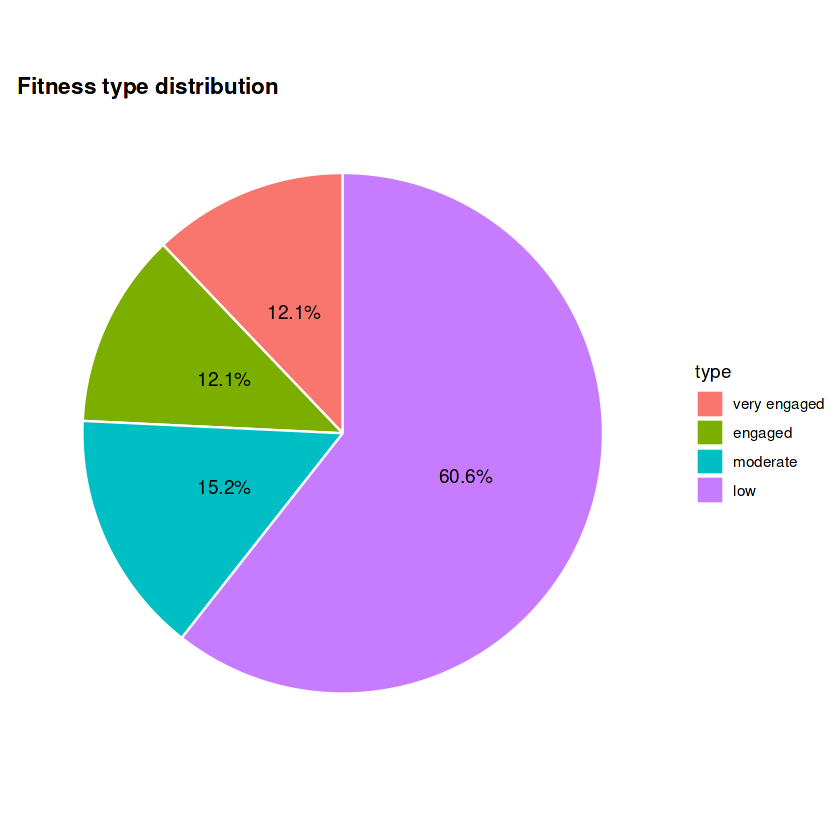

In [20]:
# Plot Fitness type
percent_act_type %>% 
  filter(category=="fitness_type") %>%
  ggplot(aes("", n, fill=type))+
  geom_bar(stat="identity", width = 1, color="white") +
  coord_polar("y", start=0)+
  theme_minimal() +
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank(), 
        axis.text.x = element_blank(),
        plot.title = element_text(face = "bold"))+
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  labs(title="Fitness type distribution")

Roughly 60% are low fitness type with an average of less than 15 minutes of exercise per day. Only 12% of participants were very engaged with their exercise averaging 45 minutes or more per day.  

We will now pursue discovering supplemental trends.

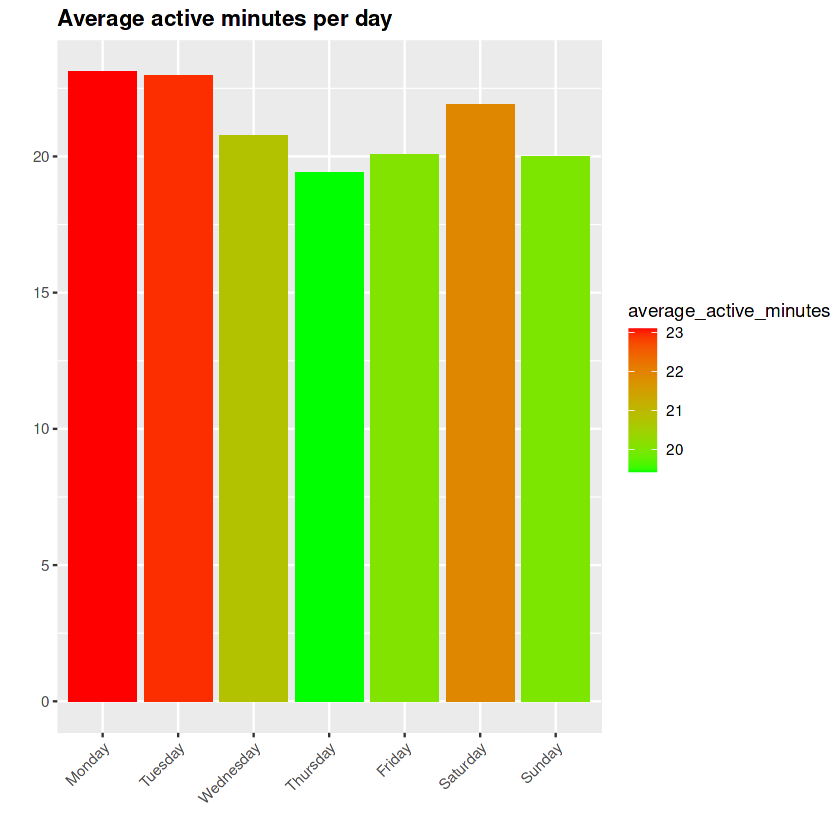

In [21]:
# Plot average active minutes by day
act_sleep %>% 
  group_by(day) %>% 
  summarise(average_active_minutes = mean(very_active_minutes)) %>% 
  ggplot(mapping = aes(x=day, y=average_active_minutes, fill=average_active_minutes))+
  geom_col() +
  scale_fill_gradient(low = "green", high = "red") +
  theme(plot.title = element_text(face = "bold")) +
  labs(title = "Average active minutes per day", x="", y="")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

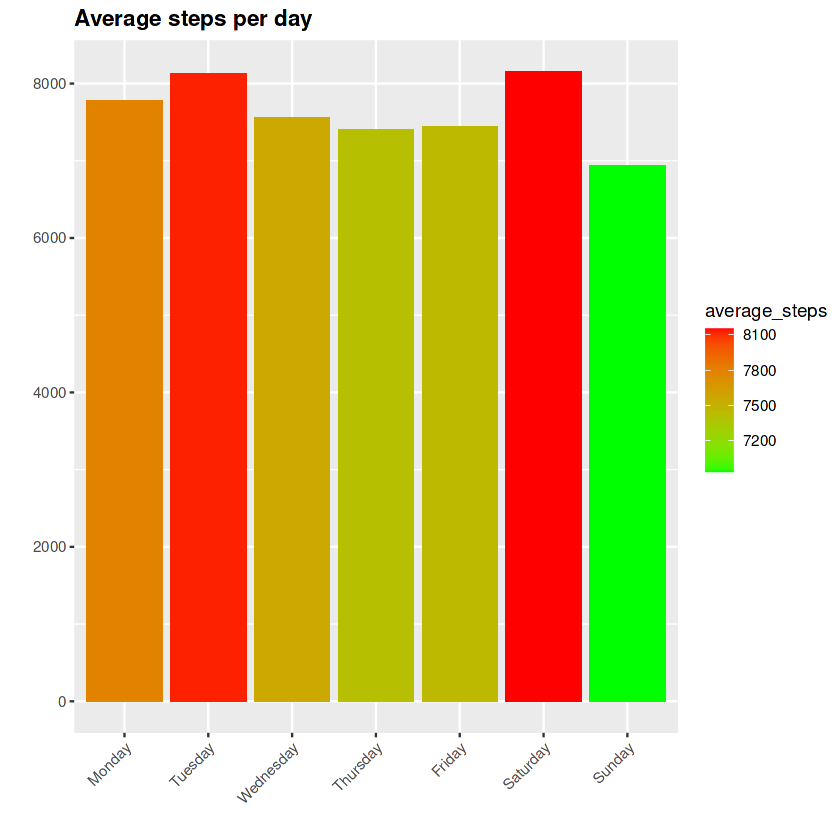

In [22]:
# Plot average steps by day
act_sleep %>% 
  group_by(day) %>% 
  summarise(average_steps = mean(total_steps)) %>% 
  ggplot(mapping = aes(x=day, y=average_steps, fill=average_steps)) +
  geom_col() +
  scale_fill_gradient(low = "green", high = "red") +
  labs(title = "Average steps per day", x="", y="")+
  theme(plot.title = element_text(face = "bold")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

`geom_smooth()` using formula = 'y ~ x'


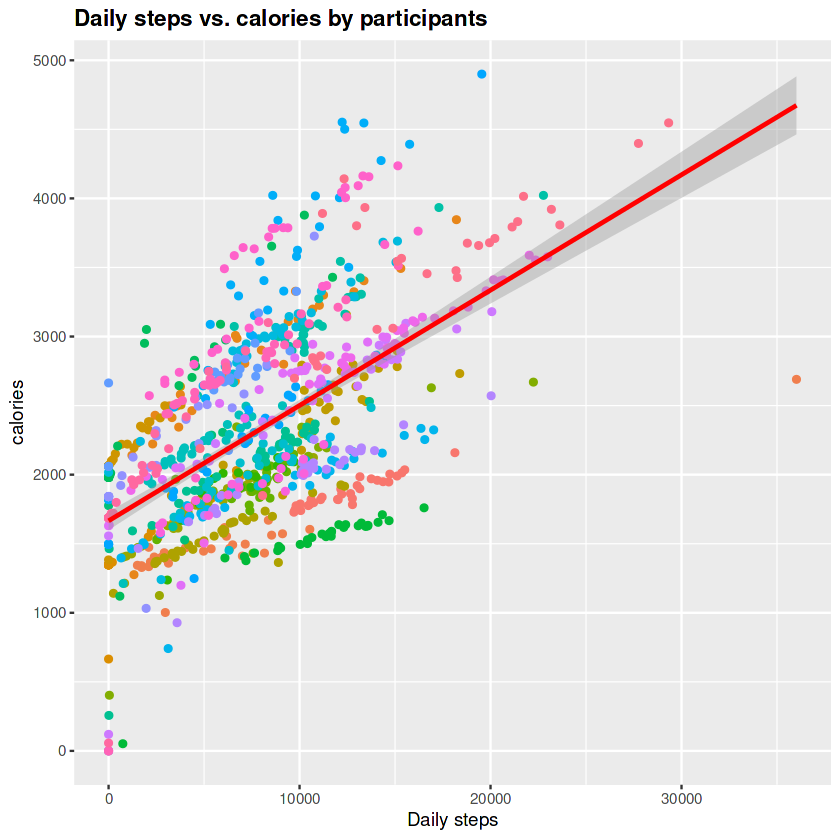

In [23]:
# Plot steps vs calories by participant
ggplot(act_sleep, aes(x=total_steps, y=calories, color=id)) +
           geom_point()+
           geom_smooth(method="lm", color="red") +
     theme(plot.title = element_text(face = "bold"),
           legend.position = "none") +
           labs(title = "Daily steps vs. calories by participants", 
                x= "Daily steps", Y = "Calories")

There is a positive correlation between total steps and calories.

`geom_smooth()` using formula = 'y ~ x'


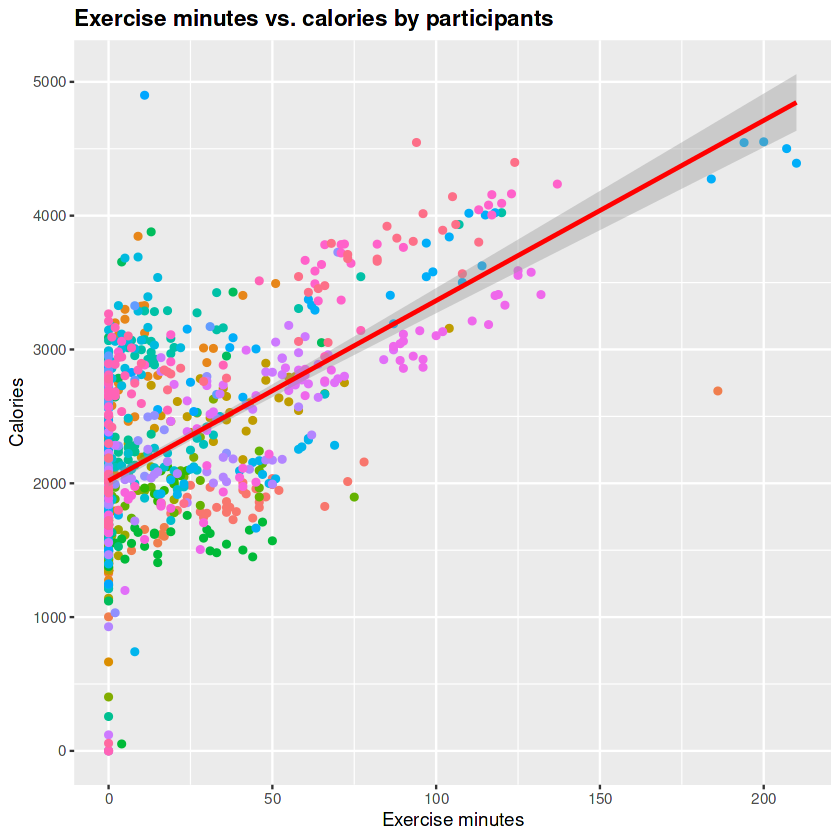

In [24]:
# Correlations with exercise time
# Exercise time vs calories
ggplot(act_sleep, aes(x=very_active_minutes, y=calories, color=id))+
  geom_point()+
  geom_smooth(method="lm", color="red")+
  theme(plot.title = element_text(face = "bold"), 
        legend.position = "none") +
  labs(title = "Exercise minutes vs. calories by participants", x="Exercise minutes",
       y="Calories")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


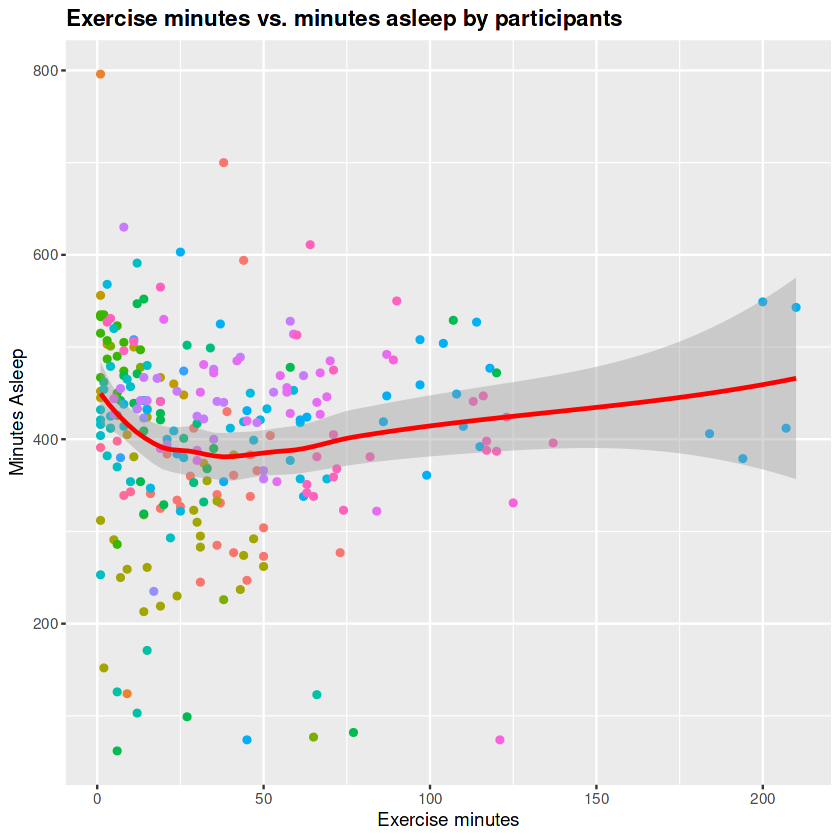

In [25]:
# Exercise time vs minutes asleep
act_sleep %>% 
  group_by(id) %>% 
  drop_na(total_minutes_asleep) %>% # drop NA values in total minutes asleep column
  filter(very_active_minutes!=0) %>% # drop 0 values in very active minutes column
  ggplot(aes(x=very_active_minutes, y=total_minutes_asleep, color=id))+
  geom_point()+
  geom_smooth(color="red")+
  theme(plot.title = element_text(face = "bold"),
        legend.position = "none") +
  labs(title = "Exercise minutes vs. minutes asleep by participants", x="Exercise minutes", y="Minutes Asleep")

Positive correlation between exercise time and calories.  There is no correlation between exercise time and amount of sleep.

## Conclusion

Following our analysis, we propose the following recommendations:

1. Provide users with an alarm or a gentle reminder to wear and engage with their smart devices daily 
2. Provide users with digital tools and resources to improve their sleep quality
3. Facilitate user engagement and personalized experience with their device by allowing users to customize features on the app - setting health and fitness goals, correcting inaccurate data, and more.
4. Provide notification on current steps taken and offer motivational tools to meet the daily minimum of 8000 steps recommended by the CDC
5. Incentivize rewards program to increase exercise time or meet personalized health and fitness goals  

Lastly, we recognize the limitations of the data. Bellabeats' products cater to women, so exploring proprietary data may offer additional unique insights for their target audience; furthermore, understanding why 36% of consumers do not wear their devices daily may lead to discoveries of new opportunities. 

## Acknowledgement
I am thankful to Google Learning Services, Kaggle, and Bellabeat for the opportunity to learn and explore data analytics using RStudio. Furthermore, I am grateful to the many students through whom I have learned so much and inspired to complete this project.